In [1]:
import pandas as pd
import numpy as np
import datetime
from dbds import generate_hotel_dfs
from sim import generate_simulation
from model_cancellations import get_otb_res, predict_cancellations
from sklearn.preprocessing import OneHotEncoder as ohe

pd.options.display.max_rows = 150
pd.options.display.max_columns = 250

DATE_FMT = "%Y-%m-%d"
h1_capacity = 187
h2_capacity = 226
AOD = "2017-08-01"
AOD_dt = pd.to_datetime(AOD)

h1_res = pd.read_pickle("pickle/h1_res.pick")
h2_res = pd.read_pickle("pickle/h2_res.pick")
h1_dbd = pd.read_pickle("pickle/h1_dbd.pick")
h2_dbd = pd.read_pickle("pickle/h2_dbd.pick")
# h1_sim = pd.read_pickle("pickle/h1_sim.pick")
# h2_sim = pd.read_pickle("pickle/h2_sim.pick")

In [2]:
# h1_res, h1_dbd = generate_hotel_dfs("../data/H1.csv", capacity=h1_capacity)
# h2_res, h2_dbd = generate_hotel_dfs("../data/H2.csv", capacity=h2_capacity)



In [3]:
# h1_res.to_pickle("pickle/h1_res.pick")
# h1_dbd.to_pickle("pickle/h1_dbd.pick")
# h2_res.to_pickle("pickle/h2_res.pick")
# h2_dbd.to_pickle("pickle/h2_dbd.pick")



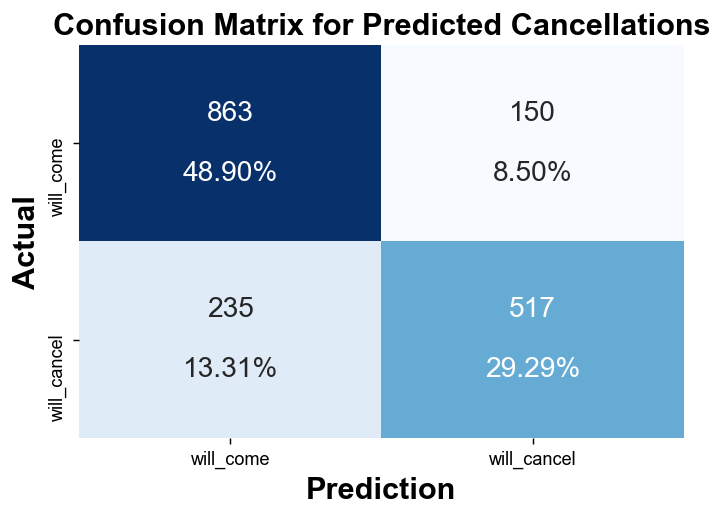

Optimal probability threshold (to maximize F-0.5): 0.67
F-0.5 Score: 0.756

Setting up simulation...
Estimating prices...
Pulling T-Minus OTB statistics...
Pulling STLY OTB statistics...
Training 31 models to obtain STLY statistics...


STLY statistics obtained.

Calculating pace statistics...

Simulation setup complete. As of date: 2017-08-01.



In [4]:
h1_sim = generate_simulation(h1_dbd, AOD, 1, h1_res)

In [ ]:
h2_sim = generate_simulation(h2_dbd, AOD, 2, h2_res)

In [ ]:
h1_sim[["TRN_RoomsOTB", "TRNP_RoomsOTB", "GRP_RoomsOTB", "CNT_RoomsOTB"]].sum()
h1_sim['NONTRN_RoomsOTB'] = h1_sim.TRNP_RoomsOTB + h1_sim.GRP_RoomsOTB + h1_sim.CNT_RoomsOTB 
h1_sim['NONTRN_RoomRevOTB'] = h1_sim.TRNP_RevOTB + h1_sim.GRP_RevOTB + h1_sim.CNT_RevOTB 
h1_sim['NONTRN_ADR_OTB'] = h1_sim.NONTRN_RoomRevOTB / h1_sim.NONTRN_RoomsOTB
h1_sim[['NONTRN_RoomsOTB', 'NONTRN_ADR_OTB', 'NONTRN_RoomRevOTB']]

In [ ]:
'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'

In [ ]:
[col for col in h1_sim.columns]

In [ ]:
X_cols = [
    "DaysUntilArrival",
    "RoomsOTB",
    "RevOTB",
    "CxlForecast",
    "RemSupply",
    "SellingPrice",
    "STLY_SellingPrice",
    "TRN_RoomsOTB",
    "TRN_RevOTB",
    "TRN_CxlForecast",
    "LYA_RoomsSold",
    "LYA_ADR",
    "LYA_RoomRev",
    "WE",
    "WD",
    "Mon",
    "Sat",
    "Sun",
    "Thu",
    "Tue",
    "Wed",
    "RoomsGapToLYA",
    "ADR_GapToLYA",
    "TM30_TRN_RoomsPickup",
    "TM30_TRN_ADR_Pickup",
    "TM30_TRN_RevPickup",
    "TM15_RoomsPickup",
    "TM15_ADR_Pickup",
    "TM15_RevPickup",
    "TM15_TRN_RoomsPickup",
    "TM15_TRN_ADR_Pickup",
    "TM15_TRN_RevPickup",
    "TM05_RoomsPickup",
    "TM05_ADR_Pickup",
    "TM05_RevPickup",
    "TM05_TRN_RoomsPickup",
    "TM05_TRN_ADR_Pickup",
    "TM05_TRN_RevPickup",
    "RoomsOTB_Pace",
    "ADR_OTB_Pace",
    "RevOTB_Pace",
    "TRN_RoomsOTB_Pace",
    "TRN_ADR_OTB_Pace",
    "TRN_RevOTB_Pace",
    "TM30_RoomsPickup_Pace",
    "TM30_ADR_Pickup_Pace",
    "TM30_RevPickup_Pace",
    "TM15_RoomsPickup_Pace",
    "TM15_ADR_Pickup_Pace",
    "TM15_RevPickup_Pace",
    "TM05_RoomsPickup_Pace",
    "TM05_ADR_Pickup_Pace",
    "TM05_RevPickup_Pace",
    "TM30_TRN_RoomsPickup_Pace",
    "TM30_TRN_ADR_Pickup_Pace",
    "TM30_TRN_RevPickup_Pace",
    "TM15_TRN_RoomsPickup_Pace",
    "TM15_TRN_ADR_Pickup_Pace",
    "TM15_TRN_RevPickup_Pace",
    "TM05_TRN_RoomsPickup_Pace",
    "TM05_TRN_ADR_Pickup_Pace",
    "TM05_TRN_RevPickup_Pace",
]

y_col = 'Actual_RoomRev'

In [ ]:
X1 = h1_sim[X_cols]
y1 = h1_sim[y_col]

In [ ]:
X1.head()

In [ ]:
y1.head()

In [7]:

h1_test = pd.read_pickle("../data/otb-data/h1_sim_2016-08-08.pick")

In [8]:
h1_test.head()

,DOW,RoomsOTB,RevOTB,TRN_RoomsOTB,TRN_RevOTB,TRNP_RoomsOTB,TRNP_RevOTB,GRP_RoomsOTB,GRP_RevOTB,CNT_RoomsOTB,CNT_RevOTB,Date,WE,WD,STLY_Date,DaysUntilArrival,ADR_OTB,LYA_RoomsSold,LYA_RoomRev,LYA_NumCancels,LYA_TRN_RoomsSold,LYA_TRN_RoomRev,LYA_GRP_RoomsSold,LYA_GRP_RoomRev,LYA_TRNP_RoomsSold,LYA_TRNP_RoomRev,LYA_CNT_RoomsSold,LYA_CNT_RoomRev,Realized_Cxls,SellingPrice,TM30_RoomsOTB,TM30_RevOTB,TM30_TRN_RoomsOTB,TM30_TRN_RevOTB,TM30_TRNP_RoomsOTB,TM30_TRNP_RevOTB,TM30_GRP_RoomsOTB,TM30_GRP_RevOTB,TM30_CNT_RoomsOTB,TM30_CNT_RevOTB,TM15_RoomsOTB,TM15_RevOTB,TM15_TRN_RoomsOTB,TM15_TRN_RevOTB,TM15_TRNP_RoomsOTB,TM15_TRNP_RevOTB,TM15_GRP_RoomsOTB,TM15_GRP_RevOTB,TM15_CNT_RoomsOTB,TM15_CNT_RevOTB,TM05_RoomsOTB,TM05_RevOTB,TM05_TRN_RoomsOTB,TM05_TRN_RevOTB,TM05_TRNP_RoomsOTB,TM05_TRNP_RevOTB,TM05_GRP_RoomsOTB,TM05_GRP_RevOTB,TM05_CNT_RoomsOTB,TM05_CNT_RevOTB,STLY_RoomsOTB,STLY_RevOTB,STLY_SellingPrice,STLY_TM05_RoomsOTB,STLY_TM05_RevOTB,STLY_TM15_RoomsOTB,STLY_TM15_RevOTB,STLY_TM30_RoomsOTB,STLY_TM30_RevOTB,STLY_TRN_RoomsOTB,STLY_TRN_RevOTB,STLY_TM05_TRN_RoomsOTB,STLY_TM05_TRN_RevOTB,STLY_TM15_TRN_RoomsOTB,STLY_TM15_TRN_RevOTB,STLY_TM30_TRN_RoomsOTB,STLY_TM30_TRN_RevOTB,STLY_TRNP_RoomsOTB,STLY_TRNP_RevOTB,STLY_TM05_TRNP_RoomsOTB,STLY_TM05_TRNP_RevOTB,STLY_TM15_TRNP_RoomsOTB,STLY_TM15_TRNP_RevOTB,STLY_TM30_TRNP_RoomsOTB,STLY_TM30_TRNP_RevOTB,STLY_GRP_RoomsOTB,STLY_GRP_RevOTB,STLY_CNT_RoomsOTB,STLY_CNT_RevOTB,RoomsOTB_Pace,RevOTB_Pace,TRN_RoomsOTB_Pace,TRN_RevOTB_Pace
2016-08-08,Mon,183.0,33828.45,148.0,27724.35,25.0,4961.63,0.0,0.0,10.0,1142.47,2016-08-08,False,False,2015-08-10,0,184.85,182.0,29166.44,61.0,150.0,25314.32,0.0,0.0,14.0,1761.6,18.0,2090.52,100,194.61,177.0,31802.03,145.0,26383.03,22.0,4276.53,0.0,0.0,10.0,1142.47,178.0,32484.90,144.0,26541.90,24.0,4800.53,0.0,0.0,10.0,1142.47,180.0,33055.45,145.0,26951.35,25.0,4961.63,0.0,0.0,10.0,1142.47,182.0,29166.44,168.57,181.0,29252.05,172.0,27285.64,172.0,27049.11,150.0,25314.32,149.0,25399.93,140.0,23433.52,141.0,23377.79,14.0,1761.6,14.0,1761.6,14.0,1761.6,14.0,1761.6,0.0,0.0,18.0,2090.52,1.0,4662.01,-2.0,2410.03
2016-08-09,Tue,183.0,33625.94,142.0,26334.82,29.0,5787.58,0.0,0.0,12.0,1503.54,2016-08-09,False,False,2015-08-11,1,183.75,183.0,29448.31,73.0,157.0,26248.37,0.0,0.0,8.0,1171.4,18.0,2028.54,94,192.15,182.0,32726.74,144.0,26120.72,26.0,5102.48,0.0,0.0,12.0,1503.54,182.0,33180.68,142.0,26050.66,28.0,5626.48,0.0,0.0,12.0,1503.54,182.0,33428.27,141.0,26137.15,29.0,5787.58,0.0,0.0,12.0,1503.54,181.0,29046.31,165.92,181.0,29286.72,179.0,28665.94,176.0,27927.59,155.0,25846.37,155.0,26086.78,153.0,25466.00,151.0,24908.45,8.0,1171.4,8.0,1171.4,8.0,1171.4,8.0,1171.4,0.0,0.0,18.0,2028.54,2.0,4579.63,-13.0,488.45
2016-08-10,Wed,183.0,34403.59,147.0,27876.77,24.0,5023.28,0.0,0.0,12.0,1503.54,2016-08-10,False,False,2015-08-12,2,188.00,179.0,28464.99,81.0,151.0,24890.85,0.0,0.0,12.0,1796.3,16.0,1777.84,95,195.40,176.0,32118.36,143.0,26276.64,21.0,4338.18,0.0,0.0,12.0,1503.54,181.0,33946.01,145.0,27419.19,24.0,5023.28,0.0,0.0,12.0,1503.54,182.0,34205.92,146.0,27679.10,24.0,5023.28,0.0,0.0,12.0,1503.54,179.0,28572.82,165.80,179.0,28765.90,181.0,29095.90,179.0,28472.55,150.0,24807.68,150.0,25000.76,152.0,25330.76,150.0,24707.41,13.0,1987.3,13.0,1987.3,13.0,1987.3,13.0,1987.3,0.0,0.0,16.0,1777.84,4.0,5830.77,-3.0,3069.09
2016-08-11,Thu,175.0,34050.85,139.0,27281.01,26.0,5504.95,0.0,0.0,10.0,1264.89,2016-08-11,False,False,2015-08-13,3,194.58,182.0,29235.50,80.0,157.0,26108.22,0.0,0.0,8.0,1201.7,17.0,1925.58,100,200.52,161.0,30041.95,130.0,24450.05,21.0,4327.01,0.0,0.0,10.0,1264.89,169.0,32706.14,135.0,26429.14,24.0,5012.11,0.0,0.0,10.0,1264.89,172.0,33378.18,136.0,26608.34,26.0,5504.95,0.0,0.0,10.0,1264.89,181.0,29070.99,166.59,180.0,28885.67,177.0,28268.89,167.0,26052.94,155.0,25836.51,154.0,25651.19,151.0,25034.41,144.0,23431.66,8.0,1201.7,8.0,1201.7,8.0,1201.7,6.0,757.3,0.0,0.0,18.0,2032.78,-6.0,4979.86,-16.0,1444.50
2016-08-12,Fri,181.0,34873.34,141.0,28100.34,24.0,4932.75,0.0,0.0,16.0,1

In [9]:
h1_test.shape

(32, 93)

In [10]:
import re
import os

In [12]:
os.listdir("../data/otb-data/")

['h1_sim_2017-06-15.pick',
 'h1_sim_2017-04-28.pick',
 'h2_sim_2017-04-08.pick',
 'h1_sim_2016-12-12.pick',
 'h1_sim_2017-05-05.pick',
 'h2_sim_2017-07-18.pick',
 'h2_sim_2017-05-25.pick',
 'h1_sim_2016-11-02.pick',
 'h2_sim_2016-11-22.pick',
 'h1_sim_2017-02-01.pick',
 'h2_sim_2017-02-21.pick',
 'h1_sim_2016-08-18.pick',
 'h1_sim_2017-01-11.pick',
 'h2_sim_2017-01-31.pick',
 'h2_sim_2016-09-15.pick',
 'h1_sim_2017-02-17.pick',
 'h2_sim_2017-01-27.pick',
 'h1_sim_2017-01-07.pick',
 'h2_sim_2016-09-03.pick',
 'h1_sim_2016-09-23.pick',
 'h2_sim_2017-06-23.pick',
 'h1_sim_2017-06-03.pick',
 'h2_sim_2016-12-24.pick',
 'h2_sim_2016-10-19.pick',
 'h1_sim_2016-12-04.pick',
 'h1_sim_2017-05-13.pick',
 'h1_sim_2016-11-14.pick',
 'h1_sim_2016-08-22.pick',
 'h2_sim_2016-08-02.pick',
 'h1_sim_2017-03-16.pick',
 'h1_sim_2016-12-28.pick',
 'h1_sim_2016-10-15.pick',
 'h2_sim_2016-12-08.pick',
 'h1_sim_2017-04-12.pick',
 'h2_sim_2016-11-18.pick',
 'h1_sim_2017-07-02.pick',
 'h2_sim_2017-07-22.pick',
 

In [16]:
h1_files = [f for f in os.listdir("../data/otb-data/") if f[:2] == 'h1']
h1_files.sort()
h1_files

['h1_sim_2016-08-01.pick',
 'h1_sim_2016-08-02.pick',
 'h1_sim_2016-08-03.pick',
 'h1_sim_2016-08-04.pick',
 'h1_sim_2016-08-05.pick',
 'h1_sim_2016-08-06.pick',
 'h1_sim_2016-08-07.pick',
 'h1_sim_2016-08-08.pick',
 'h1_sim_2016-08-09.pick',
 'h1_sim_2016-08-10.pick',
 'h1_sim_2016-08-11.pick',
 'h1_sim_2016-08-12.pick',
 'h1_sim_2016-08-13.pick',
 'h1_sim_2016-08-14.pick',
 'h1_sim_2016-08-15.pick',
 'h1_sim_2016-08-16.pick',
 'h1_sim_2016-08-17.pick',
 'h1_sim_2016-08-18.pick',
 'h1_sim_2016-08-19.pick',
 'h1_sim_2016-08-20.pick',
 'h1_sim_2016-08-21.pick',
 'h1_sim_2016-08-22.pick',
 'h1_sim_2016-08-23.pick',
 'h1_sim_2016-08-24.pick',
 'h1_sim_2016-08-25.pick',
 'h1_sim_2016-08-26.pick',
 'h1_sim_2016-08-27.pick',
 'h1_sim_2016-08-28.pick',
 'h1_sim_2016-08-29.pick',
 'h1_sim_2016-08-30.pick',
 'h1_sim_2016-08-31.pick',
 'h1_sim_2016-09-01.pick',
 'h1_sim_2016-09-02.pick',
 'h1_sim_2016-09-03.pick',
 'h1_sim_2016-09-04.pick',
 'h1_sim_2016-09-05.pick',
 'h1_sim_2016-09-06.pick',
 

In [21]:
%%time
FOLDER = "../data/otb-data/"

df = pd.DataFrame()
for otb_data in h1_files:
    df = df.append(pd.read_pickle(FOLDER + otb_data))

df.shape

CPU times: user 3.45 s, sys: 1.18 s, total: 4.63 s
Wall time: 4.67 s


(11711, 93)

In [22]:
df.columns

Index(['DOW', 'RoomsOTB', 'RevOTB', 'TRN_RoomsOTB', 'TRN_RevOTB',
       'TRNP_RoomsOTB', 'TRNP_RevOTB', 'GRP_RoomsOTB', 'GRP_RevOTB',
       'CNT_RoomsOTB', 'CNT_RevOTB', 'Date', 'WE', 'WD', 'STLY_Date',
       'DaysUntilArrival', 'ADR_OTB', 'LYA_RoomsSold', 'LYA_RoomRev',
       'LYA_NumCancels', 'LYA_TRN_RoomsSold', 'LYA_TRN_RoomRev',
       'LYA_GRP_RoomsSold', 'LYA_GRP_RoomRev', 'LYA_TRNP_RoomsSold',
       'LYA_TRNP_RoomRev', 'LYA_CNT_RoomsSold', 'LYA_CNT_RoomRev',
       'Realized_Cxls', 'SellingPrice', 'TM30_RoomsOTB', 'TM30_RevOTB',
       'TM30_TRN_RoomsOTB', 'TM30_TRN_RevOTB', 'TM30_TRNP_RoomsOTB',
       'TM30_TRNP_RevOTB', 'TM30_GRP_RoomsOTB', 'TM30_GRP_RevOTB',
       'TM30_CNT_RoomsOTB', 'TM30_CNT_RevOTB', 'TM15_RoomsOTB', 'TM15_RevOTB',
       'TM15_TRN_RoomsOTB', 'TM15_TRN_RevOTB', 'TM15_TRNP_RoomsOTB',
       'TM15_TRNP_RevOTB', 'TM15_GRP_RoomsOTB', 'TM15_GRP_RevOTB',
       'TM15_CNT_RoomsOTB', 'TM15_CNT_RevOTB', 'TM05_RoomsOTB', 'TM05_RevOTB',
       'TM05_TRN_Rooms

In [25]:
df.loc[:'2017-07-31']

,DOW,RoomsOTB,RevOTB,TRN_RoomsOTB,TRN_RevOTB,TRNP_RoomsOTB,TRNP_RevOTB,GRP_RoomsOTB,GRP_RevOTB,CNT_RoomsOTB,CNT_RevOTB,Date,WE,WD,STLY_Date,DaysUntilArrival,ADR_OTB,LYA_RoomsSold,LYA_RoomRev,LYA_NumCancels,LYA_TRN_RoomsSold,LYA_TRN_RoomRev,LYA_GRP_RoomsSold,LYA_GRP_RoomRev,LYA_TRNP_RoomsSold,LYA_TRNP_RoomRev,LYA_CNT_RoomsSold,LYA_CNT_RoomRev,Realized_Cxls,SellingPrice,TM30_RoomsOTB,TM30_RevOTB,TM30_TRN_RoomsOTB,TM30_TRN_RevOTB,TM30_TRNP_RoomsOTB,TM30_TRNP_RevOTB,TM30_GRP_RoomsOTB,TM30_GRP_RevOTB,TM30_CNT_RoomsOTB,TM30_CNT_RevOTB,TM15_RoomsOTB,TM15_RevOTB,TM15_TRN_RoomsOTB,TM15_TRN_RevOTB,TM15_TRNP_RoomsOTB,TM15_TRNP_RevOTB,TM15_GRP_RoomsOTB,TM15_GRP_RevOTB,TM15_CNT_RoomsOTB,TM15_CNT_RevOTB,TM05_RoomsOTB,TM05_RevOTB,TM05_TRN_RoomsOTB,TM05_TRN_RevOTB,TM05_TRNP_RoomsOTB,TM05_TRNP_RevOTB,TM05_GRP_RoomsOTB,TM05_GRP_RevOTB,TM05_CNT_RoomsOTB,TM05_CNT_RevOTB,STLY_RoomsOTB,STLY_RevOTB,STLY_SellingPrice,STLY_TM05_RoomsOTB,STLY_TM05_RevOTB,STLY_TM15_RoomsOTB,STLY_TM15_RevOTB,STLY_TM30_RoomsOTB,STLY_TM30_RevOTB,STLY_TRN_RoomsOTB,STLY_TRN_RevOTB,STLY_TM05_TRN_RoomsOTB,STLY_TM05_TRN_RevOTB,STLY_TM15_TRN_RoomsOTB,STLY_TM15_TRN_RevOTB,STLY_TM30_TRN_RoomsOTB,STLY_TM30_TRN_RevOTB,STLY_TRNP_RoomsOTB,STLY_TRNP_RevOTB,STLY_TM05_TRNP_RoomsOTB,STLY_TM05_TRNP_RevOTB,STLY_TM15_TRNP_RoomsOTB,STLY_TM15_TRNP_RevOTB,STLY_TM30_TRNP_RoomsOTB,STLY_TM30_TRNP_RevOTB,STLY_GRP_RoomsOTB,STLY_GRP_RevOTB,STLY_CNT_RoomsOTB,STLY_CNT_RevOTB,RoomsOTB_Pace,RevOTB_Pace,TRN_RoomsOTB_Pace,TRN_RevOTB_Pace
2016-08-01,Mon,181.0,30000.01,151.0,25903.52,20.0,2969.60,0.0,0.00,10.0,1126.89,2016-08-01,False,False,2015-08-03,0,165.75,178.0,26579.60,54.0,133.0,21444.49,0.0,0.0,15.0,1814.28,30.0,3320.83,71,176.01,175.0,28404.00,145.0,24307.51,20.0,2969.60,0.0,0.00,10.0,1126.89,175.0,28536.80,145.0,24440.31,20.0,2969.60,0.0,0.00,10.0,1126.89,171.0,27933.34,141.0,23836.85,20.0,2969.60,0.0,0.00,10.0,1126.89,178.0,26579.60,160.36,173.0,25712.31,168.0,24572.57,172.0,24998.88,133.0,21444.49,128.0,20577.20,121.0,19116.48,124.0,19419.79,15.0,1814.28,15.0,1814.28,16.0,2013.28,16.0,2013.28,0.0,0.0,30.0,3320.83,3.0,3420.41,18.0,4459.03
2016-08-02,Tue,183.0,31061.89,159.0,27780.05,14.0,2134.60,0.0,0.00,10.0,1147.24,2016-08-02,False,False,2015-08-04,1,169.74,182.0,27585.83,58.0,132.0,21725.78,0.0,0.0,18.0,2360.88,32.0,3499.17,81,178.09,180.0,29880.26,156.0,26598.42,14.0,2134.60,0.0,0.00,10.0,1147.24,180.0,30125.10,156.0,26843.26,14.0,2134.60,0.0,0.00,10.0,1147.24,182.0,30598.64,158.0,27316.80,14.0,2134.60,0.0,0.00,10.0,1147.24,179.0,26971.73,163.14,176.0,26399.13,172.0,25296.70,177.0,25901.61,129.0,21111.68,126.0,20539.08,122.0,19576.67,126.0,20058.58,18.0,2360.88,18.0,2360.88,17.0,2098.88,17.0,2098.88,0.0,0.0,32.0,3499.17,4.0,4090.16,30.0,6668.37
2016-08-03,Wed,174.0,30144.62,152.0,27062.88,14.0,2162.60,0.0,0.00,8.0,919.14,2016-08-03,False,False,2015-08-05,2,173.24,182.0,27831.73,59.0,137.0,22485.30,0.0,0.0,16.0,2136.16,29.0,3210.27,86,181.69,179.0,30517.59,157.0,27435.85,14.0,2162.60,0.0,0.00,8.0,919.14,176.0,30361.96,154.0,27280.22,14.0,2162.60,0.0,0.00,8.0,919.14,173.0,29906.87,151.0,26825.13,14.0,2162.60,0.0,0.00,8.0,919.14,178.0,26966.83,163.93,174.0,26349.33,174.0,26247.68,174.0,25803.81,133.0,21620.40,129.0,21002.90,128.0,20820.72,128.0,20474.40,16.0,2136.16,16.0,2136.16,15.0,1874.16,15.0,1874.16,0.0,0.0,29.0,3210.27,-4.0,3177.79,19.0,5442.48
2016-08-04,Thu,179.0,32412.13,149.0,27503.67,20.0,3731.12,0.0,0.00,10.0,1177.34,2016-08-04,False,False,2015-08-06,3,181.07,180.0,27947.92,57.0,137.0,22760.64,0.0,0.0,19.0,2506.66,24.0,2680.62,96,187.83,173.0,30621.96,145.0,26214.16,18.0,3230.46,0.0,0.00,10.0,1177.34,177.0,31801.65,149.0,27393.85,18.0,3230.46,0.0,0.00,10.0,1177.34,177.0,31930.67,149.0,27522.87,18.0,3230.46,0.0,0.00,10.0,1177.34,177.0,27246.82,164.97,176.0,27065.32,174.0,26695.28,169.0,25175.89,134.0,22059.54,133.0,21878.04,129.0,21088.45,125.0,20005.63,19.0,2506.66,19.0,2506.66,20.0,2705.66,18.0,2244.66,0.0,0.0,24.0,2680.62,2.0,5165.31,15.0,5444.13
2016-08-05,Fri,176.0,32956.31,142.0,

TypeError: `n` argument must be an integer, got <class 'pandas.core.series.Series'>

In [46]:
def apply_aod(row):
    stay_date = pd.to_datetime(row["Date"])
    n_days_b4 = int(row["DaysUntilArrival"])
    return pd.to_datetime(stay_date - pd.DateOffset(n_days_b4), format=DATE_FMT)

df[["Date", "DaysUntilArrival"]].apply(apply_aod, axis=1)

2016-08-01   2016-08-01
2016-08-02   2016-08-01
2016-08-03   2016-08-01
2016-08-04   2016-08-01
2016-08-05   2016-08-01
                ...    
2017-08-27   2017-08-01
2017-08-28   2017-08-01
2017-08-29   2017-08-01
2017-08-30   2017-08-01
2017-08-31   2017-08-01
Length: 11711, dtype: datetime64[ns]

AttributeError: 'Timedelta' object has no attribute 'dt'